# TTK4225 Assignment 6

Submit your assignment as a PDF in blackboard.

The most important thing in this assignment is to understand the logics behind each procedural step you take. Thus for the teachers it does not matter which way you choose, the important is that you understand what you do.

### Question 1

The objective is to compare the trajectories between a nonlinear system and its linearization around an equilibrium point. More specifically, consider one of the simplest nonlinear systems, i.e., the pendulum without friction,
$$
    \ddot{\theta} = - \sin (\theta)
$$
and its linearized version around $\theta=0$, which gives
$$
    \ddot{\theta} = - \theta .
$$
Simulate both the nonlinear and linear systems for small initial conditions (for simplicity consider $\dot{\theta}_0 = 0$) and compare the trajectories for the original and linearized models. 

Through these plots, indicate for which initial condition you would say that the linearized model is not anymore a meaningful approximation of the original one. 

In the codeblock below, you may select initial conditions and time span for teh simulation. It is not necessary to change anything in the simulation block.

In [1]:
# Initial contidions are expressed as a tuple: (theta_0, theta_dot_0).
initial_conditions = [
    (0, 0),  # example
    (0, 0)
]

t_span = [0, 15]  # Time span for the simulation

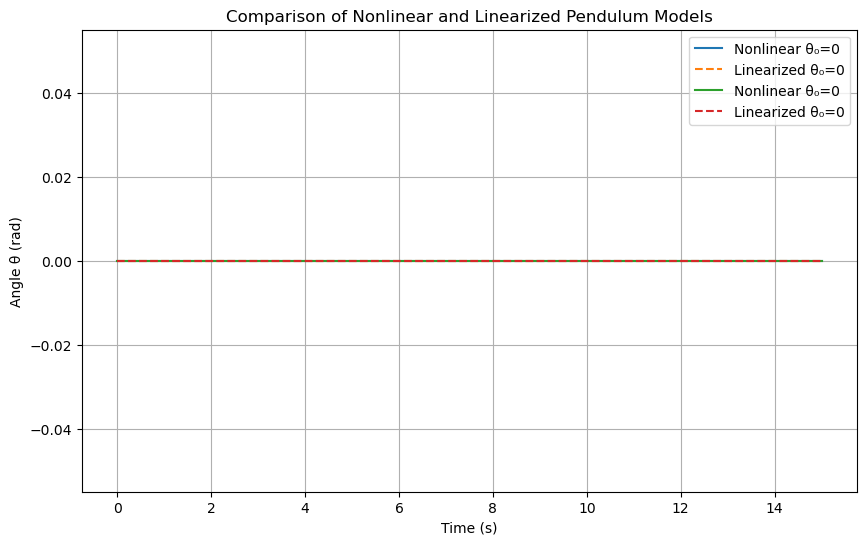

In [2]:
####################################################################
# It is not necessary to change/modify any of the code in this block
####################################################################

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the nonlinear pendulum equation
def nonlinear_pendulum(t, y):
    theta, theta_dot = y
    return [theta_dot, -np.sin(theta)]

# Define the linearized pendulum equation
def linearized_pendulum(t, y):
    theta, theta_dot = y
    return [theta_dot, -theta]

# Simulation parameters
t_eval = np.linspace(t_span[0], t_span[1],500)  # Evaluation times

# Plotting the results
plt.figure(figsize=(10, 6))

for theta_0, theta_dot_0 in initial_conditions:
    # Initial condition [theta_0, theta_dot_0]
    y0 = [theta_0, theta_dot_0]

    # Solve the nonlinear system
    sol_nonlinear = solve_ivp(nonlinear_pendulum, t_span, y0, t_eval=t_eval)

    # Solve the linearized system
    sol_linear = solve_ivp(linearized_pendulum, t_span, y0, t_eval=t_eval)

    # Plot the results
    plt.plot(sol_nonlinear.t, sol_nonlinear.y[0], label=f'Nonlinear θ₀={theta_0}')
    plt.plot(sol_linear.t, sol_linear.y[0], '--', label=f'Linearized θ₀={theta_0}')

# Customize plot
plt.title('Comparison of Nonlinear and Linearized Pendulum Models')
plt.xlabel('Time (s)')
plt.ylabel('Angle θ (rad)')
plt.legend()
plt.grid(True)
plt.show()

### Answer Question 1 here

### Question 2
Repeat the same exercise as above, this time though considering a pendulum with friction, i.e.,
$$
    \ddot{\theta} = - b \dot{\theta} - \sin (\theta).
$$
If one increases $b$, does the set of initial conditions for which the linearized system is a good approximation of the original nonlinear system expand or contract? And why, from intuitive perspectives?

In [3]:
# Initial contidions are expressed as a tuple: (theta_0, theta_dot_0).
initial_conditions = [
    (0, 0),  # Small initial angle
    (0, 0)

]

# Friction coefficient b 
b_values = [0.0, 1.0]  # example values

# Simulation parameters
t_span = [0, 20]  # Time span for the simulation


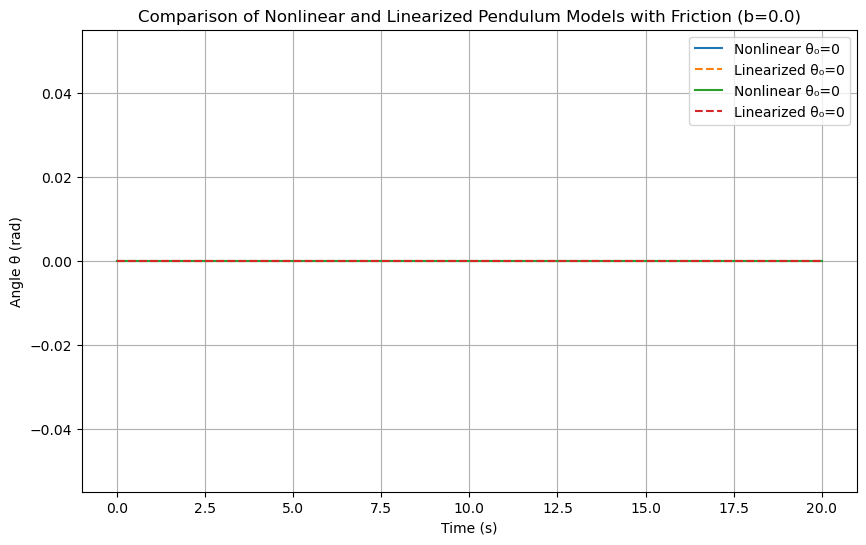

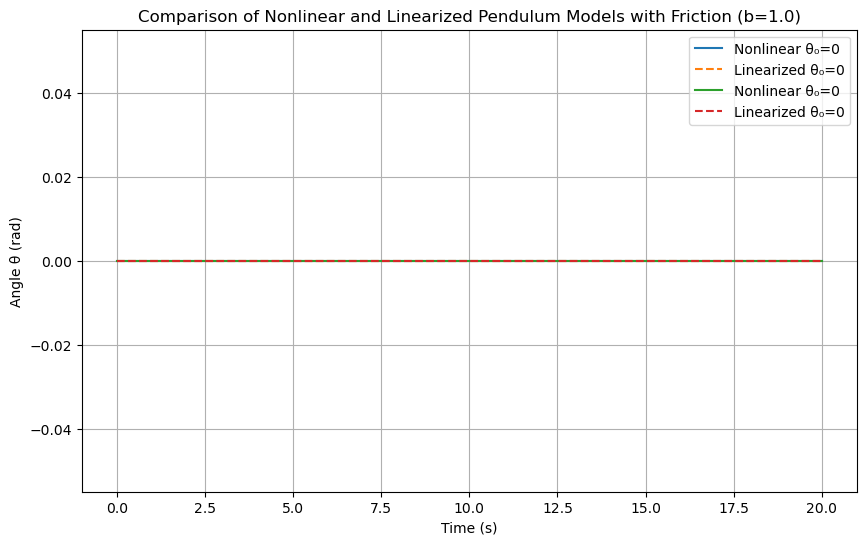

In [4]:
####################################################################
# It is not necessary to change/modify any of the code in this block
####################################################################

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the nonlinear pendulum with friction equation
def nonlinear_pendulum_friction(t, y, b):
    theta, theta_dot = y
    return [theta_dot, -b * theta_dot - np.sin(theta)]

# Define the linearized pendulum with friction equation
def linearized_pendulum_friction(t, y, b):
    theta, theta_dot = y
    return [theta_dot, -b * theta_dot - theta]

t_eval = np.linspace(t_span[0], t_span[1],500)  # Evaluation times


# Plotting the results
for b in b_values:
    plt.figure(figsize=(10, 6))
    
    for theta_0, theta_dot_0 in initial_conditions:
        # Initial condition [theta_0, theta_dot_0]
        y0 = [theta_0, theta_dot_0]

        # Solve the nonlinear system with friction
        sol_nonlinear = solve_ivp(nonlinear_pendulum_friction, t_span, y0, t_eval=t_eval, args=(b,))

        # Solve the linearized system with friction
        sol_linear = solve_ivp(linearized_pendulum_friction, t_span, y0, t_eval=t_eval, args=(b,))

        # Plot the results
        plt.plot(sol_nonlinear.t, sol_nonlinear.y[0], label=f'Nonlinear θ₀={theta_0}')
        plt.plot(sol_linear.t, sol_linear.y[0], '--', label=f'Linearized θ₀={theta_0}')

    # Customize plot
    plt.title(f'Comparison of Nonlinear and Linearized Pendulum Models with Friction (b={b})')
    plt.xlabel('Time (s)')
    plt.ylabel('Angle θ (rad)')
    plt.legend()
    plt.grid(True)
    plt.show()


### Answer Question 2 here

### Question 3
Considering a Van der Pol oscillator linearized around its unique equilibrium (note that you shall find the equations of such a linearized system). How big is the set of initial conditions for which the linearized system is a good approximation of the original nonlinear system? And why, from intuitive perspectives?

a) 
Linearize a Van der Pol Oscilator around its unique equilibrium(note that you shall find the equations of such a linearized system). 

b)
Explain why the linearization around (0,0) is only valid for very small initial conditions.

b) 
Discuss wether the existence of a limit cycle makes linearization around the equilibrium misleading. If so, why?

### Answer Question 3 here

# Optional task

If you want to see how to linearize 'real life' systems you can find an example related to the maglev system presented in class here: https://mega.nz/file/2B0jGZDK#1DCOXidMcOwNK7GXJh8nHgScpY_OZ2SxU5bxd78jFg0.

Note that the linked document has all the solutions in it, so you may just decide to go through it and see how things are done. At the same time you are encouraged to try to find the solution by yourself first, and check if you were right afterwards.